In [10]:
# Import packages
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data
X = pd.read_csv("C:/Users/Tara/Downloads/Housing_train.csv")
X_test_full = pd.read_csv("C:/Users/Tara/Downloads/Housing_test.csv")

In [3]:
# Get an intial understanding of the data
X.head()
X.describe()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   MSZoning       1259 non-null   object 
 3   LotFrontage    1041 non-null   float64
 4   LotArea        1259 non-null   int64  
 5   Street         1259 non-null   object 
 6   Alley          76 non-null     object 
 7   LotShape       1259 non-null   object 
 8   LandContour    1259 non-null   object 
 9   Utilities      1259 non-null   object 
 10  LotConfig      1259 non-null   object 
 11  LandSlope      1259 non-null   object 
 12  Neighborhood   1259 non-null   object 
 13  Condition1     1259 non-null   object 
 14  Condition2     1259 non-null   object 
 15  BldgType       1259 non-null   object 
 16  HouseStyle     1259 non-null   object 
 17  OverallQual    1259 non-null   int64  
 18  OverallC

In [4]:
# Refine data to exclude the datatype of objects.
X_num = X.select_dtypes(exclude=['object'])
X_num
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1259 non-null   int64  
 1   MSSubClass     1259 non-null   int64  
 2   LotFrontage    1041 non-null   float64
 3   LotArea        1259 non-null   int64  
 4   OverallQual    1259 non-null   int64  
 5   OverallCond    1259 non-null   int64  
 6   YearBuilt      1259 non-null   int64  
 7   YearRemodAdd   1259 non-null   int64  
 8   MasVnrArea     1252 non-null   float64
 9   BsmtFinSF1     1259 non-null   int64  
 10  BsmtFinSF2     1259 non-null   int64  
 11  BsmtUnfSF      1259 non-null   int64  
 12  TotalBsmtSF    1259 non-null   int64  
 13  1stFlrSF       1259 non-null   int64  
 14  2ndFlrSF       1259 non-null   int64  
 15  LowQualFinSF   1259 non-null   int64  
 16  GrLivArea      1259 non-null   int64  
 17  BsmtFullBath   1259 non-null   int64  
 18  BsmtHalf

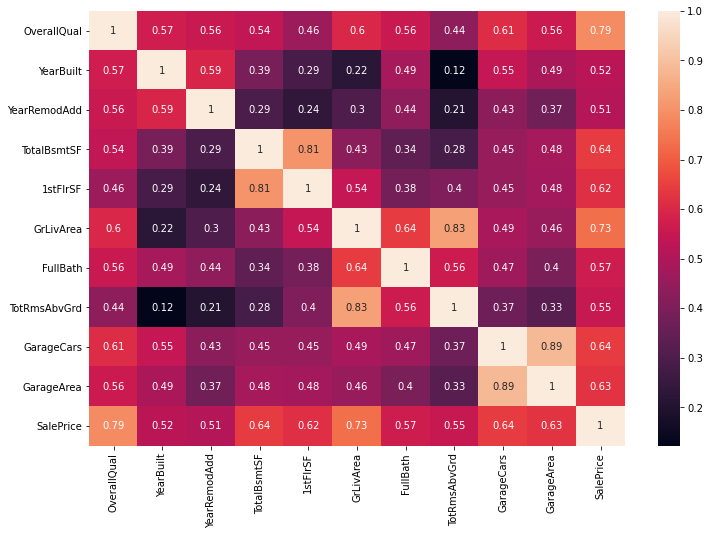

In [6]:
# Create refined heatmap:
corr = X_num.corr()    
highest = corr.index[abs(corr['SalePrice'] > 0.5)]
plt.subplots(figsize=(12, 8))
high_corr = X[highest].corr()
sns.heatmap(high_corr, annot=True)
plt.show()

In [7]:
# Create list of correlation between the target varaible and the predictor variables:
corr = X.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

SalePrice        1.000000
OverallQual      0.790786
GrLivArea        0.733480
GarageCars       0.642079
TotalBsmtSF      0.641946
GarageArea       0.625499
1stFlrSF         0.617868
FullBath         0.566303
TotRmsAbvGrd     0.552707
YearBuilt        0.524407
YearRemodAdd     0.512674
GarageYrBlt      0.490973
MasVnrArea       0.483754
Fireplaces       0.460081
BsmtFinSF1       0.409673
LotFrontage      0.378138
2ndFlrSF         0.335212
WoodDeckSF       0.316402
OpenPorchSF      0.315975
HalfBath         0.298473
LotArea          0.267146
BsmtFullBath     0.223671
BsmtUnfSF        0.207560
BedroomAbvGr     0.170714
ScreenPorch      0.123616
PoolArea         0.101972
MoSold           0.049208
3SsnPorch        0.020845
BsmtFinSF2       0.000474
BsmtHalfBath    -0.018857
Id              -0.022742
LowQualFinSF    -0.026166
MiscVal         -0.031333
YrSold          -0.036798
MSSubClass      -0.076628
OverallCond     -0.083382
EnclosedPorch   -0.118917
KitchenAbvGr    -0.133655
Name: SalePr

In [8]:
# Create list of percentages of missing data for the target variables:
nulls = X.isnull().sum()/len(X)*100
nulls = nulls[nulls>0]
nulls.sort_values(inplace=True, ascending=False)
print(nulls)

PoolQC          99.682288
MiscFeature     95.949166
Alley           93.963463
Fence           80.937252
FireplaceQu     47.577442
LotFrontage     17.315330
GarageType       5.639396
GarageYrBlt      5.639396
GarageFinish     5.639396
GarageQual       5.639396
GarageCond       5.639396
BsmtExposure     2.859412
BsmtFinType2     2.859412
BsmtCond         2.779984
BsmtFinType1     2.779984
BsmtQual         2.779984
MasVnrArea       0.555997
MasVnrType       0.555997
dtype: float64


In [9]:
# Deal with missing data from columns with greater than 60% correalation to the target variable
# by filling with zeros (as this fits these particular columns best):
for col in ['GarageCars', 'GarageArea']:
    X[col] = X[col].fillna(int(0))

In [11]:
# Prepare the model, chosing only the columns with over 60% correlation to the target varaible.
cols = ('OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', '1stFlrSF')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(X[c].values)) 
    X[c] = lbl.transform(list(X[c].values))

In [12]:
# Drop all unwanted columns from the dataframe and set SalePrice as the target variable.   
X.drop(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 
        'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
        'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
        'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 
        'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 
        'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'], axis=1, inplace=True)
y = X.SalePrice              
y = y.values

In [13]:
# Verify that we only have only the columns we want for the model.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1259 non-null   int64
 1   TotalBsmtSF  1259 non-null   int64
 2   1stFlrSF     1259 non-null   int64
 3   GrLivArea    1259 non-null   int64
 4   GarageCars   1259 non-null   int64
 5   GarageArea   1259 non-null   int64
 6   SalePrice    1259 non-null   int64
dtypes: int64(7)
memory usage: 69.0 KB


In [14]:
# Then delete the target varaible column.
X.drop(['SalePrice'], axis=1, inplace=True) 

In [15]:
# Split the data into 20% test data and 80% training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Create Linear Regression Model.
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Print intercept and coefficients for writing of formula.
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -29916.696111731464
Coefficients: [2.50290038e+04 9.07603031e+01 1.01389644e+00 1.02379383e+02
 3.18351885e+03 9.92858221e+01]


In [25]:
# Check the model's accuracy and run prediction.
model.score(X_test, y_test)*100

79.61033605391532

In [26]:
y_pred = model.predict(X_test)

In [27]:
# Error Calculation
MSE = np.square(np.subtract(y, y_pred)).mean()

ValueError: operands could not be broadcast together with shapes (1259,) (252,) 

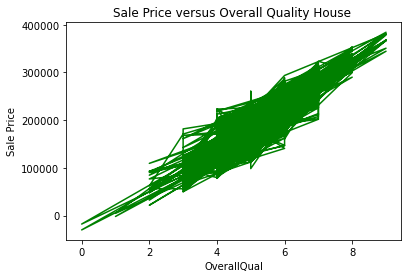

In [28]:
# Create visualization of model.
overall = X_train[X.columns[0]]
plt.plot(overall, model.predict(X_train), color = "green")

plt.title("Sale Price versus Overall Quality House ")
plt.xlabel("OverallQual")
plt.ylabel("Sale Price")
plt.show()

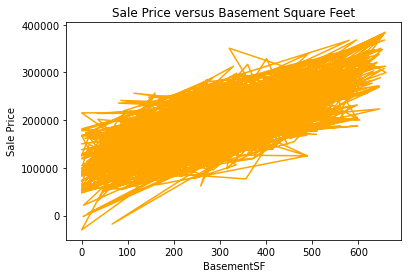

In [30]:
basement = X_train[X.columns[1]]
plt.plot(basement, model.predict(X_train), color = "orange")

plt.title("Sale Price versus Basement Square Feet")
plt.xlabel("BasementSF")
plt.ylabel("Sale Price")
plt.show()

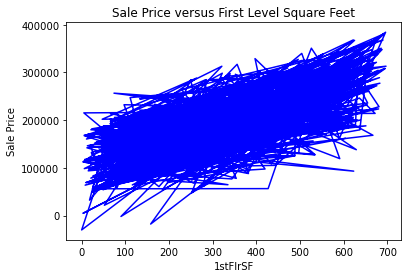

In [31]:
Floor = X_train[X.columns[2]]
plt.plot(Floor, model.predict(X_train), color = "blue")

plt.title("Sale Price versus First Level Square Feet")
plt.xlabel("1stFlrSF")
plt.ylabel("Sale Price")
plt.show()

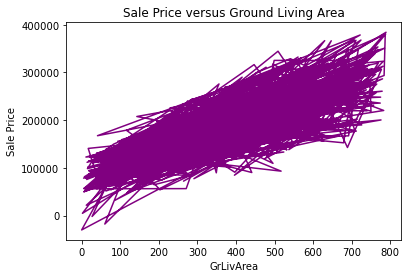

In [32]:
Liv = X_train[X.columns[3]]
plt.plot(Liv, model.predict(X_train), color = "purple")

plt.title("Sale Price versus Ground Living Area")
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price")
plt.show()

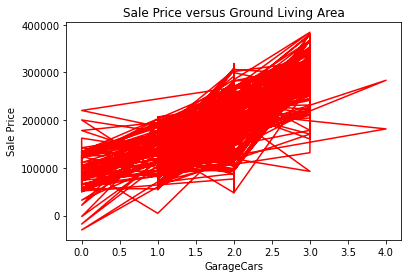

In [33]:
Cars = X_train[X.columns[4]]
plt.plot(Cars, model.predict(X_train), color = "red")

plt.title("Sale Price versus Ground Living Area")
plt.xlabel("GarageCars")
plt.ylabel("Sale Price")
plt.show()

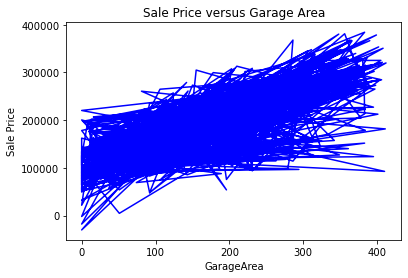

In [35]:
Area = X_train[X.columns[5]]
plt.plot(Area, model.predict(X_train), color = "blue")

plt.title("Sale Price versus Garage Area")
plt.xlabel("GarageArea")
plt.ylabel("Sale Price")
plt.show()

In [36]:
# This type of model is used when there is one target variable and multiple predictor varaibles.
# The mathematical formula for a linear regression model is: 
#    y = b0 + b1*x1 + b2*x2 + ...bn*xn
#    such that y = the target variable, each x is a predictor variable 
#    (OverallQual, TotalBmtSf, etc.), and each b is a regression coefficient such that b0 is the y-intercept.
# The formula for this exact model is:
#    y = -29916.696 + 2.50290038e+04* x1 + 9.07603031e+01* x2 
#    + 1.01389644e+00 * x3 + 1.02379383e+02 * x4 + 3.18351885e+03 * x5 
#    + 9.92858221e+01 * x6
#    such that x1 = OverallQual,  x2 = TotalBsmtSF, x3 = 1stFlrSF, 
#    x4 = GrLivArea, x5 = GarageCars, x6 = GarageArea.
    
# Other possible models which could be considered incluse a logistic regression, which is used
# when there are binary outcomes, like if we wanted to know if the sale price would be greatere than 
# a certain threshold or not, or Poisson regression, which is used when the data includes 
# counts and events occur rarely, such as the number of times a house with a large garage has
# a much smaller sale price. However, the multiple linear regression model was chosen as it
# best suited the dataset for a general prediction model, rather than be built with a certain 
# question in mind to answer, such as the other models may be better suited for.
 


# The Overall Quality of the house has the largest correlation with sale price, 
# followed by ground level living area, number of cars the garage can fit,
# total basement square feet, the garage area, the first floor square feet. Each of these 
# showed more than 60% correlation with sale price and were thus chosen as predictor
# variables for the model.

In [3]:
# Resources:
# House Price Prediction. (n.d.). Kaggle. https://www.kaggle.com/c/neolen-house-price-prediction 

# How To Run Linear Regressions In Python Scikit-Learn. (n.d.). ActiveState. 
#    https://www.activestate.com/resources/quick-reads/how-to-run-linear-regressions-in-python-scikit-learn/

# Python|Mean Squared Error. (2019, July 30). GeeksforGeeks. 
#    https://www.geeksforgeeks.org/python-mean-squared-error/ 